In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('S02-hw-dataset.csv')

print(df.head(41))


    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          2      442
20       21  

In [4]:
print(df.info()) # основная информация о датсете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [5]:
print(df.describe()) # описательная статистика датасета

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [6]:
print(df.isna().mean()) # доля пропусков каждого столбца

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [7]:
print(df.duplicated()) # проверка наличия дублирующих строк

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


In [8]:
print(df.age < 0 )# проверка на отрицательное значение возраста 
print(df.age > 100 )# проверка на несуществующие значение возраста 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: age, dtype: bool
0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40   

In [9]:
print(df.purchases < 0) # проверка на несуществующее значение колличества покупок

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: purchases, dtype: bool


В результате небольшого анализа были выявлены следующие проблемы качества данных: 3 пропущенных значений в столбце age,1 дублирующиеся строки - 40 и 9,
 нереалтистичные значениия в столбцах age и purchases в 5й  строке.

In [10]:
print(df['country'].value_counts()) # частоты для категориальной переменно country

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [11]:
df1 = df 
df1 = df1.drop('user_id',axis = 1) # удаляем столбец,нецелесобразным для средних значений
gr = df1.groupby('country')# группируем датасет по странам 
gr.mean() # выводим среднее значений столбцов для каждой страны


,age,purchases,revenue
country,,,
CN,24.000000,4.500000,1054.000000
DE,34.600000,6.500000,1445.500000
FR,46.250000,4.250000,675.916667
RU,30.076923,4.769231,790.076923
US,36.714286,4.625000,557.375000


In [12]:
gr1 = gr.age.agg(['max','min']) # выводим максимальный и минимальный возраст человека по странам
gr1

,max,min
country,,
CN,28.0,20.0
DE,52.0,18.0
FR,120.0,22.0
RU,54.0,5.0
US,51.0,23.0


В результате наблюдаем , что сумма покупок граждан Германии сильно доминирует среди других стран соответственно их покупкам , интересно отметить что при относительно молодом возрасте(разброс возраста от 20 до 28 )сумма покупок у граждан Китая уступает лишь гражаднам Германии. 

In [ ]:
!pip install matplotlib

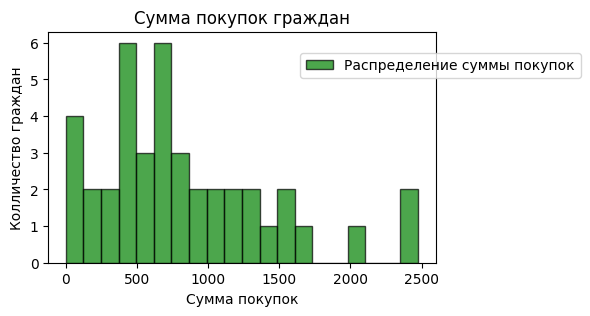

In [19]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist( 
    df["revenue"],
    bins=20,
    label='Распределение суммы покупок',
    color='green',
    edgecolor='black',
    alpha=0.7
)

ax.set_xlabel('Сумма покупок') 
ax.set_ylabel('Колличество граждан') 
ax.legend(loc=(0.65, 0.8)) 
ax.set_title('Сумма покупок граждан') 
plt.show()

In [ ]:
!pip install seaborn 

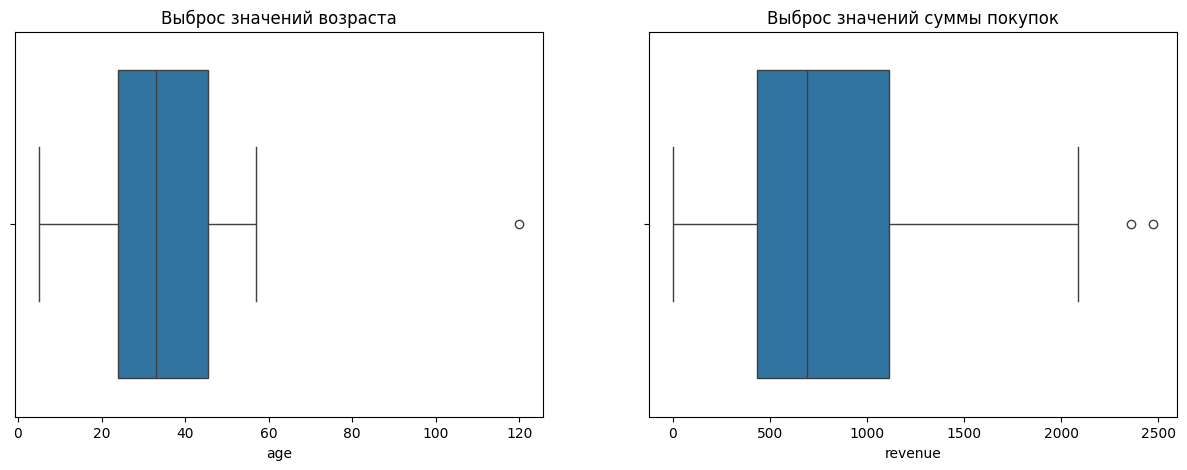

In [54]:
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(15, 5)) # визуализация выбросов значений(ящик с усами)
sns.boxplot(x=df["age"],ax=axes[0]) 
axes[0].set_title("Выброс значений возраста")
sns.boxplot(x=df["revenue"], ax=axes[1])
axes[1].set_title("Выброс значений суммы покупок")

#сохранение графика в папку figures
plt.savefig("figures\Ящик с усами.png", dpi=100,bbox_inches='tight')

plt.show()

На графиках видны разбросы значений, как раз таки несуществующий возраст,замечанный нами в начале работы и пару разбросов суммы покупок,которые в дальшем ,конечно,нужно будет усреднять со всеми.

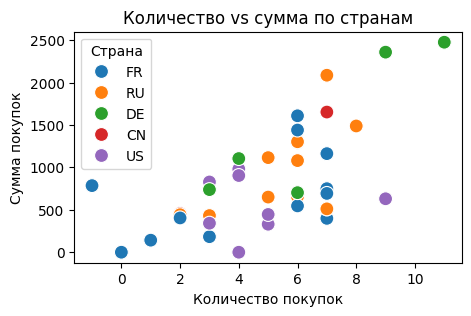

In [53]:
plt.figure(figsize=(5, 3)) # визуализация диограммы рассеивания коолличества и суммы покупок по странам
sns.scatterplot(data=df, x="purchases", y="revenue", 
                hue="country",  # цвет зависит от страны
                s=100,  
                palette='tab10') 

plt.title('Количество vs сумма по странам') 
plt.xlabel('Количество покупок') 
plt.ylabel('Сумма покупок')
plt.legend(title="Страна")

#сохранение графика в папку figures
plt.savefig("figures\Диограмма рассеивания.png", dpi=200,bbox_inches='tight')
plt.show()

Диограмма хорошо отображает не только зависимость суммы покупок от ее колличества , но и показывает связь со странами этих значений. К примеру хорошо видно, что Китайцы длеают одинаковое колличество покупок.